<h1 style="text-align:center">Deep Learning  Lab Session </h1>
<h1 style="text-align:center">First Lab Session - 3 Hours </h1>
<h1 style="text-align:center">Artificial Neural Networks for Handwritten Digits Recognition</h1>

<b> Student 1:</b> # Samuel Pierre 
<b> Student 2:</b> # Sara Giammusso  
<b> Group name:</b> # deeplearn33
 
 
The aim of this session is to practice with Artificial Neural Networks. Answers and experiments should be made by groups of two students. Each group should fill and run appropriate notebook cells. 

To generate your final report and upload it on the submission website http://bigfoot-m1.eurecom.fr/teachingsub/login (using your deeplearnXX/password). Do not forget to run all your cells before generating your final report and do not forget to include the names of all participants in the group. The lab session should be completed ans submitted by April 13th 2018 (23:59:59 CET). 

# Introduction

During this lab session, you will implement, train and test a Neural Network
for the Handwritten Digits Recognition problem <a href="http://yann.lecun.com/exdb/mnist/"> [1] </a> with  different settings of hyperparameters. You will use the MNIST dataset which was constructed from scanned documents available from the National Institute of Standards and Technology (NIST). Images of digits were taken from a variety of scanned documents, normalized in size and centered. 


<img src="Nimages/mnist.png",width="350" height="500" align="center">
<center><span>Figure 1: MNIST digits examples</span></center>


This assignment includes a written part of programms to help you understand how to build and train
your neural net and then to test your code and get results. 

1. <a href="NeuralNetwork.py"> NeuralNetwork.py </a> 
2. <a href="transfer_functions.py"> transfer_functions.py </a> 
3.  <a href="utils.py "> utils.py </a> 


Functions defined inside the python files mentionned above can be imported  using the python command "from filename import function".

You will use the following libraries:

1. <a href="http://cs231n.github.io/python-numpy-tutorial/"> numpy </a>: for creating arrays and using methods to manipulate arrays;

2. <a href="http://matplotlib.org/"> matplotlib  </a>: for making plots.

Before starting the lab, please launch the cell below. After that, you may not need to do any imports during the lab.

In [19]:
# All imports
from NeuralNetwork import NeuralNetwork
from transfer_functions import *
from utils import *
import numpy as np
import matplotlib
import time, random

# Section 1 :  Your First Neural Network

<b>Part 1</b>: Before designing and writing your code, you will first work on a neural network by hand. 
Consider the following neural network with two inputs $x=(x_1,x_2)$, one hidden layer and a single output unit $y$.
The initial weights are set to random values. Neurons 6 and 7 represent biases. Bias values are equal to 1. You will consider a training sample whose feature vector is $x = (0.8, 0.2)$ and whose label is $y = 0.4$.

Assume that neurons have a sigmoid activation function  $f(x)=\frac{1}{(1+e^{-x})}$. The loss function $L$ is a Mean Squared Error (MSE): if $o$ denotes the output of the neural network, then the loss for a given sample $(o, y)$ is $L(o, y) = \left|\left| o - y \right|\right|^2$. In the following, you will assume that if you want to backpropagate the error on a whole batch, you will backpropagate the average error on that batch. More formally, let $((x^{(1)}, y^{(1)}), ..., (x^{(N)}, y^{(N)}))$ be a batch and $o^{(k)}$ the output associated to $x^{(k)}$. Then the total error $\bar{L}$ will be as follows:

<div align="center">$\bar{L} = \frac{1}{N} \sum_{k=1}^{N} L(o^{(k)}, y^{(k)})$.</div>




<img src="Nimages/NN.png", width="700" height="900"> 
<center><span>Figure 2: Neural network </span></center>


<b>Question 1.1.1</b>: Compute the new values of weights $w_{i,j}$ after a forward pass and a backward pass, and the outputs of the neural network before and after the backward path, when the learning rate is $\lambda$=5.
$w_{i,j}$ is the weight of the connexion between neuron $i$ and neuron $j$. Please detail your computations in the cell below and print your answers.

In [2]:
lr = 5
x1, x2, x6, x7 = 0.8, 0.2, 1.0, 1.0

w13, w14, w23, w24, w63, w64 = 0.3, -0.5, 0.8, 0.2, 0.2, -0.4
w35, w45, w75 = -0.6, 0.4, 0.5
y = 0.4

x3 = w13*x1 + w23*x2 + w63*x6
x4 = w14*x1 + w24*x2 + w64*x6
x5 = w35*sigmoid(x3) + w45*sigmoid(x4) + w75*x7

print("=== FORWARD PASS 1 ===")
print("Output =", sigmoid(x5))

o = sigmoid(x5)

d_w35 = (o-y)*(2*o*(1-o))*sigmoid(x3)
d_w45 = (o-y)*(2*o*(1-o))*sigmoid(x4)
d_w75 = (o-y)*(2*o*(1-o))*x7

o3 = sigmoid(x3)
o4 = sigmoid(x4)

d_w13 = 2*(o-y)*o*(1-o)*w35*o3*(1-o3)*x1
d_w14 = 2*(o-y)*o*(1-o)*w45*o4*(1-o4)*x1
d_w23 = 2*(o-y)*o*(1-o)*w35*o3*(1-o3)*x2
d_w24 = 2*(o-y)*o*(1-o)*w45*o4*(1-o4)*x2
d_w63 = 2*(o-y)*o*(1-o)*w35*o3*(1-o3)*x6
d_w64 = 2*(o-y)*o*(1-o)*w45*o4*(1-o4)*x6

w13 -= lr*d_w13
w14 -= lr*d_w14
w23 -= lr*d_w23
w24 -= lr*d_w24
w63 -= lr*d_w63
w64 -= lr*d_w64
w35 -= lr*d_w35
w45 -= lr*d_w45
w75 -= lr*d_w75

print("=== BACKWARD PASS ===")
print("w13 =", w13)
print("w14 =", w14)
print("w23 =", w23)
print("w24 =", w24)
print("w63 =", w63)
print("w64 =", w64)
print("w35 =", w35)
print("w45 =", w45)
print("w75 =", w75)

x3 = w13*x1 + w23*x2 + w63*x6
x4 = w14*x1 + w24*x2 + w64*x6
x5 = w35*sigmoid(x3) + w45*sigmoid(x4) + w75*x7

print("=== FORWARD PASS 2 ===")
print("Output =", sigmoid(x5))

=== FORWARD PASS 1 ===
Output = 0.5597295991095776
=== BACKWARD PASS ===
w13 = 0.3432265432215471
w14 = -0.5273473101875394
w23 = 0.8108066358053868
w24 = 0.19316317245311515
w63 = 0.2540331790269339
w64 = -0.4341841377344243
w35 = -0.8541467506279605
w45 = 0.2745727217772572
w75 = 0.10637455535192786
=== FORWARD PASS 2 ===
Output = 0.40648823589210104


<div class="alert alert-info">
  As expected, after the backpropagation step we get closer to the target output. 
</div>

<b>Part 2</b>: Neural Network Implementation

Please read all source files carefully and understand the data structures and all functions.
You are to complete the missing code. 
First you should define the neural network (using the NeuralNetwork class, see in the <a href="NeuralNetwork.py"> NeuralNetwork.py</a> file) and reinitialise weights. 
Then you will need to complete the feedforward() and the backpropagate() functions. 

<b>Question 1.2.1</b>: Implement the feedforward() function.

In [22]:
class NeuralNetwork(NeuralNetwork):
    def feedforward(self, inputs):
        self.o_input = np.array(inputs)
        # Append the bias to the input vector
        if len(inputs[0]) < self.input_layer_size:
            self.o_input = np.append(self.o_input, np.ones((len(inputs), 1)), axis=1)
        # Compute output for the first hidden layer
        self.u_hidden = np.dot(self.o_input, self.W_input_to_hidden)
        self.o_hidden = self.transfer_f(self.u_hidden)
        # Append the bias again
        if len(self.o_hidden[0]) < self.hidden_layer_size:
            self.o_hidden = np.append(self.o_hidden, np.ones((len(self.o_hidden), 1)), axis=1)
        # Compute network output
        self.u_output = np.dot(self.o_hidden, self.W_hidden_to_output)
        self.o_output = self.transfer_f(self.u_output)

<b>Question 1.2.2</b>: Test your implementation: create the Neural Network defined in Part 1 and see if the feedforward() function you implemented gives the same results as the ones you found by hand.

In [4]:
# First define your neural network
model = NeuralNetwork(2,2,1)

# Then initialize the weights according to Figure 2
w13, w14, w23, w24, w63, w64 = 0.3, -0.5, 0.8, 0.2, 0.2, -0.4
w35, w45, w75 = -0.6, 0.4, 0.5
W_input_to_hidden = np.array([[w13,w14],[w23,w24],[w63,w64]])
W_hidden_to_output = np.array([[w35],[w45],[w75]])
model.weights_init(W_input_to_hidden, W_hidden_to_output)

# Feed test values
test = [[0.8, 0.2]]
model.feedforward(test)

# Print the output
print("Output =", model.o_output[0,0])

Output = 0.5597295991095776


<div class="alert alert-info">
  <strong>Good job!</strong>: the feedforward output is identical to the one obtained above.
</div>

<b>Question 1.2.3</b>: Implement the backpropagate() function.

In [23]:
class NeuralNetwork(NeuralNetwork):
    def backpropagate(self, targets, learning_rate=5.0):
        # Compute the error derivatives w.r.t. the activation for each layer
        dE_du_hidden = np.multiply(self.o_output - targets, self.transfer_df(self.u_output))

        dE_du_output = np.multiply(dE_du_hidden.dot(self.W_hidden_to_output.T), self.o_hidden*(1-self.o_hidden))
        dE_du_output = np.delete(dE_du_output, -1, axis=1)

        # Compute error's derivatives w.r.t. the weights
        dE_dw_hidden = (2/len(targets)) * np.dot(dE_du_hidden.T, self.o_hidden).T
        dE_dw_output = (2/len(targets)) * np.dot(dE_du_output.T, self.o_input).T
        
        # Update weights
        self.W_hidden_to_output -= learning_rate * dE_dw_hidden
        self.W_input_to_hidden -= learning_rate * dE_dw_output

<b>Question 1.2.4</b>: Test your implementation: create the Neural Network defined in Part 1 and see if the backpropagate() function you implemented gives the same weight updates as the ones you found by hand. Do another forward pass and see if the new output is the same as the one you obtained in Question 1.1.1.

In [6]:
# First define your neural network
model = NeuralNetwork(2,2,1)

# Then initialize the weights according to Figure 2
w13, w14, w23, w24, w63, w64 = 0.3, -0.5, 0.8, 0.2, 0.2, -0.4
w35, w45, w75 = -0.6, 0.4, 0.5
W_input_to_hidden = np.array([[w13,w14],[w23,w24],[w63,w64]])
W_hidden_to_output = np.array([[w35],[w45],[w75]])
model.weights_init(W_input_to_hidden, W_hidden_to_output)

# Feed test values
test = [[0.8, 0.2]]
model.feedforward(test)

# Backpropagate
targets = [[0.4]]
model.backpropagate(targets)

# Print weights
print("W_input_to_hidden =", model.W_input_to_hidden)
print("W_hidden_to_output =", model.W_hidden_to_output)

# Feed test values again
model.feedforward(test)

# Print the output
print("Output =", model.o_output)

W_input_to_hidden = [[ 0.34322654 -0.52734731]
 [ 0.81080664  0.19316317]
 [ 0.25403318 -0.43418414]]
W_hidden_to_output = [[-0.85414675]
 [ 0.27457272]
 [ 0.10637456]]
Output = [[0.40648824]]


<div class="alert alert-info">
  <strong>Good job!</strong> the output is identical to the one obtained above.
</div>

Checked your implementations and found that everything was fine? Congratulations! You can move to the next section.

# Section 2: Handwritten Digits Recognition

The MNIST dataset consists of handwritten digit images. It is split into a training set containing 60,000 samples and a test set containing 10,000 samples. In this Lab Session, the official training set of 60,000 images is divided into an actual training set of 50,000 samples a validation set of 10,000 samples. All digit images have been size-normalized and centered in a fixed size image of 28 x 28 pixels. Images are stored in byte form: you will use the NumPy python library to convert data files into NumPy arrays that you will use to train your Neural Networks.

You will first work with a small subset of MNIST (1000 samples), then on a very small subset of MNIST (10 samples), and eventually run a model on the whole one.

The MNIST dataset is available in the Data folder.
To get the training, testing and validation data, run the load_data() function.


In [7]:
# Just run that cell ;-)
training_data, validation_data, test_data = load_data()
small_training_data = (training_data[0][:1000], training_data[1][:1000])
small_validation_data = (validation_data[0][:200], validation_data[1][:200])
indices = [1, 3, 5, 7, 2, 0, 13, 15, 17, 4]
vsmall_training_data = ([training_data[0][i] for i in indices], [training_data[1][i] for i in indices])

Loading MNIST data .....
Done.


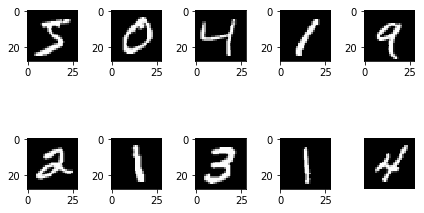

In [8]:
# And you can run that cell if you want to see what the MNIST dataset looks like
ROW = 2
COLUMN = 5
for i in range(ROW * COLUMN):
    # train[i][0] is i-th image data with size 28x28
    image = np.array(training_data[0][i]).reshape(28, 28)   
    plt.subplot(ROW, COLUMN, i+1)          
    plt.imshow(image, cmap='gray')  # cmap='gray' is for black and white picture.
plt.axis('off')  # do not show axis value
plt.tight_layout()   # automatic padding between subplots
plt.show()

<b>Part 1</b>: Build a bigger Neural Network

The input layer of the neural network that you will build contains neurons encoding the values of the input pixels. The training data for the network will consist of many 28 by 28 pixel images of scanned handwritten digits. Thus, the input layer contains 784=28×28 units. The second layer of the network is a hidden layer. We set the number of neurons in the hidden layer to 30. The output layer contains 10 neurons.

<b>Question 2.1.1</b>: Create the network described above using the NeuralNetwork class.

In [9]:
# Define your neural network
hidden_neurons = 30
mnist_model = NeuralNetwork(784,hidden_neurons,10)

<b>Question 2.1.2</b>: Train your Neural Network on the small subset of MNIST (300 iterations) and print the new accuracy on test data. You will use small_validation_data for validation. Try different learning rates (0.1, 1.0, 10.0). You should use the train() function of the NeuralNetwork class to train your network, and the weights_init() function to reinitialize weights between tests. Print the accuracy of each model on test data using the predict() function.

Training time: 16.88542675971985


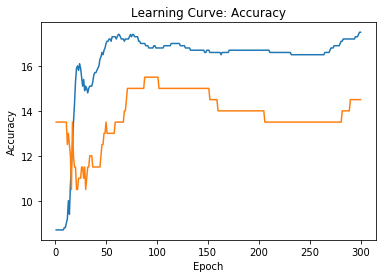

Hidden neurons: 30 Iterations: 300 Learning rate: 0.1 Accuracy: 16.09
Training time: 16.61783528327942


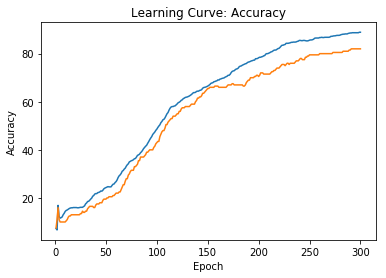

Hidden neurons: 30 Iterations: 300 Learning rate: 1 Accuracy: 82.84
Training time: 16.661217212677002


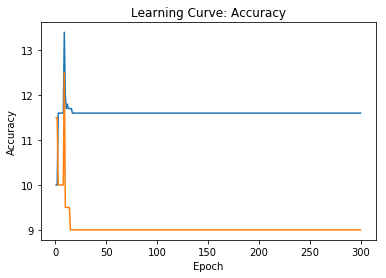

Hidden neurons: 30 Iterations: 300 Learning rate: 10 Accuracy: 10.49


In [10]:
# Train NN and print accuracy on test data
data =(small_training_data[0][:],small_training_data[1][:])
valid_data =(small_validation_data[0][:],small_validation_data[1][:])
n_iterations = 300

for learning_rate in [0.1, 1, 10]:
    mnist_model.train(data,valid_data,n_iterations,learning_rate)
    accuracy = mnist_model.predict(test_data)/100
    print('Hidden neurons:', hidden_neurons,'Iterations:',n_iterations, 'Learning rate:', learning_rate, 'Accuracy:', accuracy)
    mnist_model.weights_init()

<b>Question 2.1.3</b>: Do the same with 15 and 75 hidden neurons.

Training time: 15.977274894714355


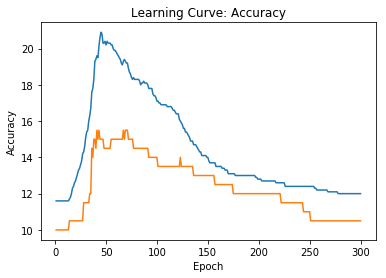

Hidden neurons: 15 Iterations: 300 Learning rate: 0.1 Accuracy: 12.03
Training time: 15.216578483581543


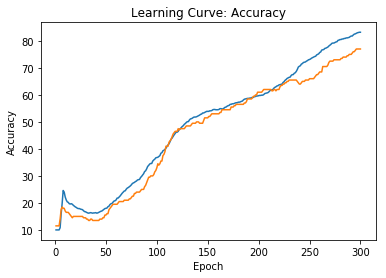

Hidden neurons: 15 Iterations: 300 Learning rate: 1 Accuracy: 77.62
Training time: 14.954369068145752


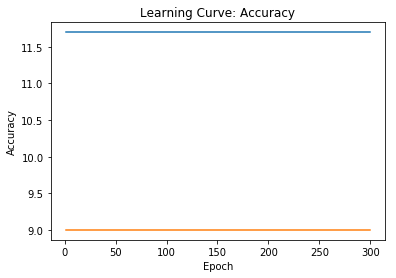

Hidden neurons: 15 Iterations: 300 Learning rate: 10 Accuracy: 10.28
Training time: 18.059837579727173


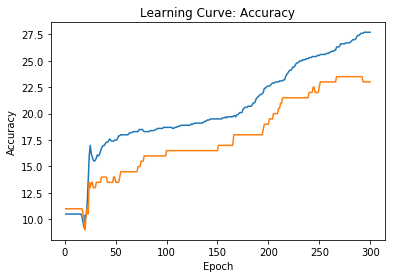

Hidden neurons: 75 Iterations: 300 Learning rate: 0.1 Accuracy: 26.18
Training time: 18.133565664291382


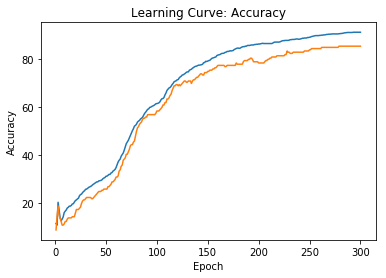

Hidden neurons: 75 Iterations: 300 Learning rate: 1 Accuracy: 84.88
Training time: 17.97995162010193


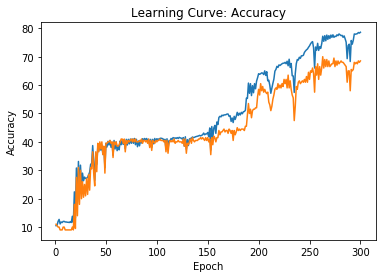

Hidden neurons: 75 Iterations: 300 Learning rate: 10 Accuracy: 68.58


In [11]:
data =(small_training_data[0][:],small_training_data[1][:])
valid_data =(small_validation_data[0][:],small_validation_data[1][:])

hidden_neurons = [15, 75]
learning_rates = [0.1, 1, 10]
n_iterations = 300

for hn in hidden_neurons:
    mnist_model = NeuralNetwork(784,hn,10)
    for learning_rate in learning_rates: 
        mnist_model.train(data,valid_data,n_iterations,learning_rate)
        accuracy = mnist_model.predict(test_data)/100
        print('Hidden neurons:', hn,'Iterations:',n_iterations, 'Learning rate:', learning_rate, 'Accuracy:', accuracy)
        mnist_model.weights_init()
        

<b>Question 2.1.3</b>: Repeat Questions 2.1.2 and 2.1.3 on the very small datasets. You will use small_validation_data for validation.

Training time: 1.4118468761444092


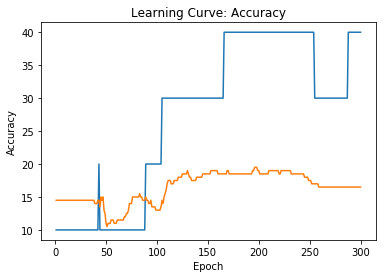

Hidden neurons: 15 Iterations: 300 Learning rate: 0.1 Accuracy: 17.1
Training time: 1.3953945636749268


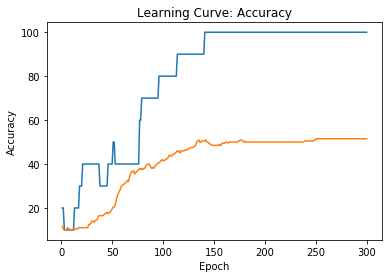

Hidden neurons: 15 Iterations: 300 Learning rate: 1 Accuracy: 48.41
Training time: 1.3578870296478271


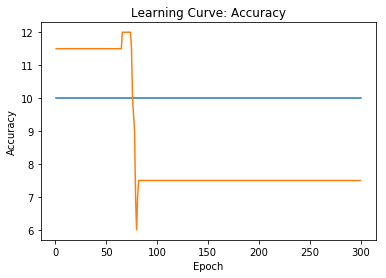

Hidden neurons: 15 Iterations: 300 Learning rate: 10 Accuracy: 8.66
Training time: 1.4315545558929443


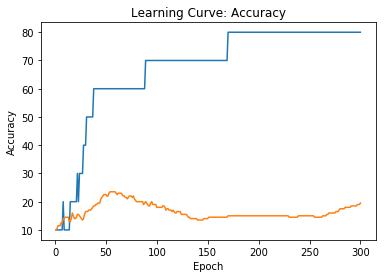

Hidden neurons: 30 Iterations: 300 Learning rate: 0.1 Accuracy: 21.55
Training time: 1.4315769672393799


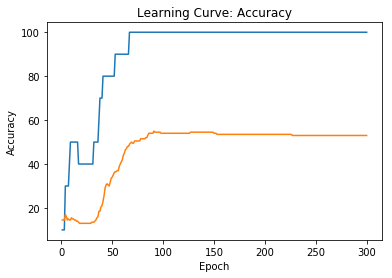

Hidden neurons: 30 Iterations: 300 Learning rate: 1 Accuracy: 50.47
Training time: 1.4289131164550781


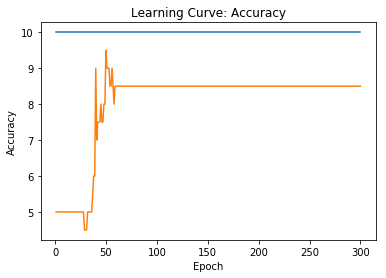

Hidden neurons: 30 Iterations: 300 Learning rate: 10 Accuracy: 9.95
Training time: 1.7023828029632568


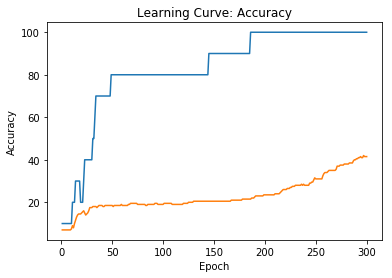

Hidden neurons: 75 Iterations: 300 Learning rate: 0.1 Accuracy: 36.8
Training time: 1.6900908946990967


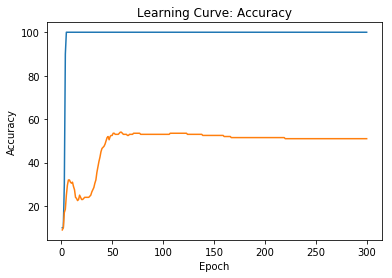

Hidden neurons: 75 Iterations: 300 Learning rate: 1 Accuracy: 51.08
Training time: 1.689380407333374


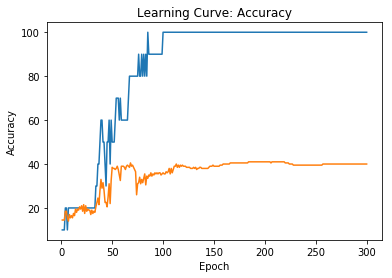

Hidden neurons: 75 Iterations: 300 Learning rate: 10 Accuracy: 44.02


In [12]:
data =(vsmall_training_data[0][:],vsmall_training_data[1][:])
valid_data =(small_validation_data[0][:],small_validation_data[1][:])

hidden_neurons = [15,30, 75]
learning_rates = [0.1, 1, 10]
n_iterations = 300

for hn in hidden_neurons:
    mnist_model = NeuralNetwork(784,hn,10)
    for learning_rate in learning_rates: 
        mnist_model.train(data,valid_data,n_iterations,learning_rate)
        accuracy = mnist_model.predict(test_data)/100
        print('Hidden neurons:', hn,'Iterations:',n_iterations, 'Learning rate:', learning_rate, 'Accuracy:', accuracy)
        mnist_model.weights_init()

<div class="alert alert-info">
**Comment**: Using the very small dataset lead us to overfit.<br> 
Indeed, the differences between validation and training accuracy are much higher w.r.t. the ones obtained with the small dataset.
</div>

<b>Question 2.1.5</b>: Explain the results you obtained at Questions 2.1.2, 2.1.3 and 2.1.4.

**Answer**: 
<div class="alert alert-info">
**Question 2.1.3 results**:
<br>
<table style="border-collapse: collapse;border: 1px solid black;" border="1">
  <tr>
  	<th></th>
  	<th colspan="3" align="center">Number of Hidden Layers</th>
  <tr>
  <tr>
    <th>Learning Rate</th>
    <th>15</th>
    <th>30</th>
    <th>75</th>
  </tr>
  <tr>
    <th>0.1</th>
    <td align="center">12%</td>
    <td align="center">16%</td>
    <td align="center">26%</td>
  </tr>
  <tr>
    <th>1</th>
    <td align="center">77%</td>
    <td align="center">82%</td>
    <td align="center">84%</td>
  </tr>
  <tr>
    <th align="center">10</th>
    <td align="center">10%</td>
    <td align="center">10%</td>
    <td align="center">68%</td>
  </tr>
</table>
Fixing the learning rate the highest accuracy is always reached with 75 neurons, while keeping the number of neurons fixed, the highest accuracy is always reached with learning_rate = 1.0. <br>
The best combination is therefore 75 neurons and 1.0 as learning_rate.<br>

**Question 2.1.4 results**: 
<table style="border-collapse: collapse;border: 1px solid black;" border="1">
  <tr>
  	<th></th>
  	<th colspan="3" align="center">Number of Hidden Layers</th>
  <tr>
  <tr>
    <th>Learning Rate</th>
    <th>15</th>
    <th>30</th> 
    <th>75</th>
  </tr>
  <tr>
    <th>0.1</th>
    <td align="center">17%</td>
    <td align="center">21%</td>
    <td align="center">36%</td>
  </tr>
  <tr>
    <th>1</th>
    <td align="center">48%</td>
    <td align="center">50%</td>
    <td align="center">51%</td>
  </tr>
  <tr>
    <th align="center">10</th>
    <td align="center">8%</td>
    <td align="center">9%</td>
    <td align="center">44%</td>
  </tr>
</table>
The previous observation is true also in this case.<br>
With the very small dataset we have lower accuracies than the ones obtained before. This is probably due to the fact that we are using a very small dataset and we are overfitting our data.
</div>

<b>Question 2.1.6</b>: Among all the numbers of hidden neurons and learning rates you tried in previous questions, which ones would you expect to achieve best performances on the whole dataset? Justify your answer.

**Answer**:
<div class="alert alert-info">
Based on the previous answer the values with which we expect to achieve best performances on the whole dataset are: <br>
 **Hidden neurons**: 75<br>
 **Learning rate**: 1.0
</div>

<b>Question 2.1.7</b>: Train a model with the number of hidden neurons and the learning rate you chose in Question 2.1.6 and print its accuracy on the test set. You will use validation_data for validation. Training can be long on the whole dataset (~40 minutes): we suggest that you work on the optional part while waiting for the training to finish.

Loading MNIST data .....
Done.
Training time: 2357.3931124210358


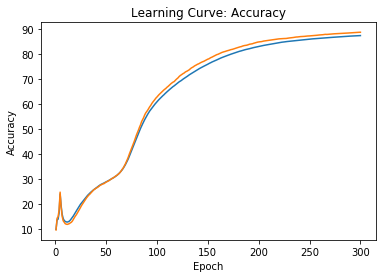

Hidden neurons: 75 Iterations: 300 Learning rate: 1.0 Accuracy: 88.45


In [18]:
training_data, validation_data, test_data = load_data()
n_iterations = 300
best_hn = 75
best_learning_rate = 1.0
mnist_model = NeuralNetwork(784,best_hn,10)
mnist_model.train(training_data,validation_data,300,best_learning_rate)
accuracy = mnist_model.predict(test_data)/100
print('Hidden neurons:', best_hn,'Iterations:',n_iterations, 'Learning rate:', best_learning_rate, 'Accuracy:', accuracy)
mnist_model.weights_init()

**Answer**:
<div class="alert alert-info">
**Good job**: with the chosen parameters combination (75, 1.0) we reach an accuracy of 88.45! <br>
However this model takes 2357 seconds (~39 minutes) to train. This is due to our implementation of the backpropagation function. Indeed we are using the gradient descent. We can try to reduce the computation time by implementing the stochastic or the mini-batch version of gradient descent.
</div>

<div class="alert alert-info">
In the following cells we implement the minibatch gradient descent.<br>
Then we will try to compare the training time of the model on the entire dataset by considering two minibatch sizes: 1 (stochastic gradient descent) and 128.
</div>

In [36]:
def create_batches(dataset, mb_size):
    for i in range(0, len(dataset), mb_size):
        yield dataset[i:i+mb_size]

class NeuralNetwork(NeuralNetwork):
    def train_minibatch(self, data, validation_data, iterations=50, learning_rate=5.0, mb_size=32, verbose=True):
        x = data[0]
        y = data[1]
        start_time = time.time()
        training_acc = []
        validation_acc = []
        for i in range(iterations):
            dataset = list(zip(x,y))
            random.shuffle(dataset)
            tot_error = 0
            for minibatch in create_batches(dataset,mb_size):
                x_mb = [x[0] for x in minibatch]
                y_mb = [x[1] for x in minibatch]
                self.feedforward(x_mb)
                self.backpropagate(y_mb, learning_rate = learning_rate)
                error = np.power(np.sum(y_mb-self.o_output),2)
                tot_error += error*len(y_mb)
            training_acc.append(100*self.predict(data)/len(data[0]))
            validation_acc.append(100*self.predict(validation_data)/len(validation_data[0]))
        
        end_time = time.time()  
        if verbose: 
            print("MSE:", tot_error/len(dataset))
            print("Training time:", end_time - start_time)
            plot_train_val(range(1, iterations+1), training_acc, validation_acc, "Accuracy")
                  

Loading MNIST data .....
Done.
MSE: 4.0664015157491855
Training time: 181.30246758460999


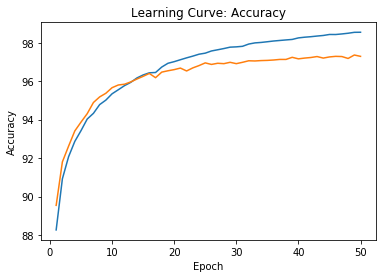

Hidden neurons: 75 Iterations: 50 Learning rate: 1.0 Accuracy: 97.4


In [40]:
training_data, validation_data, test_data = load_data()

hidden_neurons = 75
learning_rates = 1
n_iterations = 50
mb_size = 128

mnist_model = NeuralNetwork(784,hn,10)
mnist_model.train_minibatch(training_data,validation_data,n_iterations,learning_rate,mb_size)
accuracy = mnist_model.predict(test_data)/100
print('Hidden neurons:', hn,'Iterations:',n_iterations, 'Learning rate:', learning_rate, 'Accuracy:', accuracy)
mnist_model.weights_init()

<div class="alert alert-info">
**MBGD Result:** We can notice that the training time is now lower! (~3 minutes) and the accuracy is even higher w.r.t. to the gradient descent model. Indeed we just need 50 epochs to compute the result (instead of 300). <br>
Moreover we already reach a good accuracy value at epoch #10!
</div>

Loading MNIST data .....
Done.
MSE: 0.08989319554038777
Training time: 1127.5957388877869


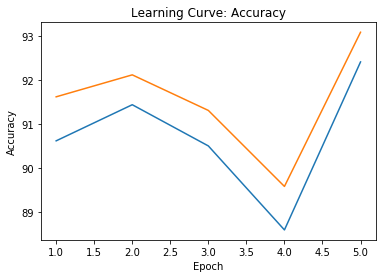

Hidden neurons: 75 Iterations: 5 Learning rate: 1.0 Accuracy: 92.85


In [43]:
training_data, validation_data, test_data = load_data()

hidden_neurons = 75
learning_rates = 1
n_iterations = 5
mb_size = 1

mnist_model = NeuralNetwork(784,hn,10)
mnist_model.train_minibatch(training_data,validation_data,n_iterations,learning_rate,mb_size)
accuracy = mnist_model.predict(test_data)/100
print('Hidden neurons:', hn,'Iterations:',n_iterations, 'Learning rate:', learning_rate, 'Accuracy:', accuracy)
mnist_model.weights_init()

<div class="alert alert-info">
**SGD Result:** As expeceted with the SGD we reach quite early an accuracy value close to the final one. Moreover the curve is neither flat nor monothonic since at each step the SGD computes the gradient of just one point (so the direction can be wrong).  
</div>

<div class="alert alert-info">
**Final comparison**:
<table style="border-collapse: collapse;border: 1px solid black;" border="1">
  <tr>
  	<th></th>
  	<th colspan="3" align="center"></th>
  <tr>
  <tr>
    <th></th>
    <th>GD</th>
    <th>MBGD</th>
    <th>SGD</th>
  </tr>
  <tr>
    <th>Epochs</th>
    <td align="center">300</td>
    <td align="center">50</td>
    <td align="center">5</td>
  </tr>
  <tr>
    <th>Training time (min)</th>
    <td align="center">40</td>
    <td align="center">3</td>
    <td align="center">19</td>
  </tr>
  <tr>
    <th align="center">Accuracy</th>
    <td align="center">88%</td>
    <td align="center">97%</td>
    <td align="center">92%</td>
  </tr>
</table>
**1) The Gradient Descent** processes large datasets and compute a gradient. It update parameters in the direction of the gradient making multiple passes over the data until convergence. <br>
This can be critical for the memory requirements (since we need the entire matrix to be in memory) and also for the high training time (~40 minutes!!).<br>

**2) Stochastic Gradient Descent** processes one data example at a time, computes a gradient, updates parameters and repeats until convergenge. This is really memory efficient for large datasets cause we don't need the entire matrix to be in memory, but just a sample. Moreover it almost immediately reaches a good accuracy value and then makes many small adjustments, but spends less time collecting feedback in between.<br>

**3) Mini-Batch Gradient Descent** : It perform weight updates after processing few (a batch of) examples at a time instead of one. This is a trade-off between the GD and the SGD. <br><br>

We reach the best accuracy with the MBGD. However this is mainly due to the choice of the number of epochs. Indeed, normaly we should obtain the best result with the Gradient Descent even if it needs a lot of epochs (and so an high training time). 

</div>

<b>Part 2 (optional)</b>: Another loss function

In classification problems, we usually replace the sigmoids in the output layer by a "softmax" function and the MSE loss by a "cross-entropy" loss. More formally, let $u = (u_1, ..., u_n)$ be the vector representing the activation of the output layer of a Neural Network. The output of that neural network is $o = (o_1, ..., o_n) = \textrm{softmax}(u)$, and

<div align="center">$\textrm{softmax}(u) = (\frac{e^{u_1}}{\sum_{k=1}^n e^{u_k}}, ..., \frac{e^{u_n}}{\sum_{k=1}^n e^{u_k}})$.</div>

If $t = (t_1, ..., t_n)$ is a vector of non-negative targets such that $\sum_{k=1}^n t_k = 1$ (which is the case in classification problems, where one target is equal to 1 and all others are equal to 0), then the cross-entropy loss is defined as follows:

<div align="center">$L_{xe}(o, t) = - \sum_{k=1}^n t_k\log(o_k)$.</div>

<b>Question 2.2.1</b>: Let $L_{xe}$ be the cross-entropy loss function and $u_i$, $i \in \lbrace 1, ..., n \rbrace$, be the activations of the output neurons. Let us assume that the transfer function of the output neurons is the softmax function. Targets are $t_1, ..., t_n$. Derive a formula for $\frac{\partial L_{xe}}{\partial u_i}$ (details of your calculations are not required).

Answer: $\frac{\partial L_{xe}}{\partial u_i} = o_i - t_i $

<b>Question 2.2.2</b>: Implement a new feedforward() function and a new backpropagate() function adapted to the cross-entropy loss instead of the MSE loss.

In [47]:
class NeuralNetwork(NeuralNetwork):
    def feedforward_xe(self, inputs):
        self.o_input = np.array(inputs)
        # Append the bias to the input vector
        if len(inputs[0]) < self.input_layer_size:
            self.o_input = np.append(self.o_input, np.ones((len(inputs), 1)), axis=1)
        # Compute output for the first hidden layer
        self.u_hidden = np.dot(self.o_input, self.W_input_to_hidden)
        self.o_hidden = self.transfer_f(self.u_hidden)
        # Append the bias again
        if len(self.o_hidden[0]) < self.hidden_layer_size:
            self.o_hidden = np.append(self.o_hidden, np.ones((len(self.o_hidden), 1)), axis=1)
        # Compute network output
        self.u_output = np.dot(self.o_hidden, self.W_hidden_to_output)
        self.o_output = softmax(self.u_output)

    def backpropagate_xe(self, targets, learning_rate=5.0):
        # Compute the error derivatives w.r.t. the activation for each layer
        dE_du_hidden = self.o_output - targets

        dE_du_output = np.multiply(dE_du_hidden.dot(self.W_hidden_to_output.T), 
                                   self.o_hidden * (1 - self.o_hidden)
                                  )
        dE_du_output = np.delete(dE_du_output, -1, axis=1)

        # Compute error's derivatives w.r.t. the weights
        dE_dw_hidden = (1/len(targets))*np.dot(dE_du_hidden.T, self.o_hidden).T
        dE_dw_output = (1/len(targets))*np.dot(dE_du_output.T, self.o_input).T
        
        # Update weights
        self.W_hidden_to_output -= learning_rate * dE_dw_hidden
        self.W_input_to_hidden -= learning_rate * dE_dw_output

<b>Question 2.2.3</b>: Create a new Neural Network with the same architecture as in Question 2.1.1 and train it using the softmax cross-entropy loss.

Training time: 16.940095901489258


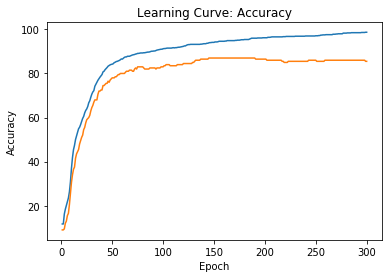

In [48]:
# Train NN and print accuracy on validation data
data =(small_training_data[0][:],small_training_data[1][:])
valid_data =(small_validation_data[0][:],small_validation_data[1][:])
n_iterations = 300
learning_rate = 1.0

mnist_model_xe = NeuralNetwork(784, 30, 10)
mnist_model_xe.train_xe(data,valid_data,n_iterations,learning_rate)
   

In [49]:
# Print accuracy on test data
accuracy = mnist_model_xe.predict(test_data)/100
print("Accuracy", accuracy)

Accuracy 87.33


<b>Question 2.2.4</b>: Compare your results with the MSE loss and with the cross-entropy loss.

<div class="alert alert-info">
The model (30, 1.0) using cross-entropy loss produces a better accuracy w.r.t to the one (30, 1.0) using MSE loss.<br>
Moreover the model with cross-entropy reaches better accuracy values earlier so we could have used less epochs to reach the same result thus reducing the training time. 
</div>

<div align="center"><b>THE END!</b>